In [1]:
//%jsroot on

In [2]:
int start = 0;
int stop = start;
TChain *fch;
fch = new TChain("RawData", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/jws202/expdata/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());}

TCanvas *c1=new TCanvas;
// 创建6×6网格画布
TCanvas *c_all = new TCanvas("c_all", "All Channel Thresholds", 900, 600);
c_all->Divide(6, 6); // 6列×6行

In [3]:
 //TModV830AC      *Mod104_TModV830AC;
   UInt_t          fGeo1;
   UInt_t          fCrateNum1;
   UInt_t          MaxChannel1;
   UInt_t          chdata1[32];
 //TModV785        *Mod107_TModV785;
   UInt_t          fGeo2;
   UInt_t          fCrateNum2;
   UInt_t          MaxChannel2;
   UShort_t        chdata2[32];
 //TModV785        *Mod111_TModV785;
   UInt_t          fGeo3;
   UInt_t          fCrateNum3;
   UInt_t          MaxChannel3;
   UShort_t        chdata3[32];

   // List of branches
   TBranch        *b_Mod104_TModV830AC_TBoard_fGeo;   //!
   TBranch        *b_Mod104_TModV830AC_TBoard_fCrateNum;   //!
   TBranch        *b_Mod104_TModV830AC_TBoard_MaxChannel;   //!
   TBranch        *b_Mod104_TModV830AC_chdata;   //!
   TBranch        *b_Mod107_TModV785_TBoard_fGeo;   //!
   TBranch        *b_Mod107_TModV785_TBoard_fCrateNum;   //!
   TBranch        *b_Mod107_TModV785_TBoard_MaxChannel;   //!
   TBranch        *b_Mod107_TModV785_chdata;   //!
   TBranch        *b_Mod111_TModV785_TBoard_fGeo;   //!
   TBranch        *b_Mod111_TModV785_TBoard_fCrateNum;   //!
   TBranch        *b_Mod111_TModV785_TBoard_MaxChannel;   //!
   TBranch        *b_Mod111_TModV785_chdata;   //!


//fch->GetListOfBranches()->Print();
//   fch->SetMakeClass(1);
/*
   TBranch        *b_fGeo2;   //!
   TBranch        *b_chdata2;   //!

    fch->SetBranchAddress("Mod107_TModV785.fGeo", &fGeo2,&b_fGeo2);
    fch->SetBranchAddress("Mod107_TModV785.chdata[32]", chdata2,&b_chdata2);
*/
   fch->SetMakeClass(1);

   fch->SetBranchAddress("Mod104_TModV830AC.TBoard.fGeo", &fGeo1, &b_Mod104_TModV830AC_TBoard_fGeo);
   fch->SetBranchAddress("Mod104_TModV830AC.TBoard.fCrateNum", &fCrateNum1, &b_Mod104_TModV830AC_TBoard_fCrateNum);
   fch->SetBranchAddress("Mod104_TModV830AC.TBoard.MaxChannel", &MaxChannel1, &b_Mod104_TModV830AC_TBoard_MaxChannel);
   fch->SetBranchAddress("Mod104_TModV830AC.chdata[32]", chdata1, &b_Mod104_TModV830AC_chdata);
   fch->SetBranchAddress("Mod107_TModV785.TBoard.fGeo", &fGeo2, &b_Mod107_TModV785_TBoard_fGeo);
   fch->SetBranchAddress("Mod107_TModV785.TBoard.fCrateNum", &fCrateNum2, &b_Mod107_TModV785_TBoard_fCrateNum);
   fch->SetBranchAddress("Mod107_TModV785.TBoard.MaxChannel", &MaxChannel2, &b_Mod107_TModV785_TBoard_MaxChannel);
   fch->SetBranchAddress("Mod107_TModV785.chdata[32]", chdata2, &b_Mod107_TModV785_chdata);
   fch->SetBranchAddress("Mod111_TModV785.TBoard.fGeo", &fGeo3, &b_Mod111_TModV785_TBoard_fGeo);
   fch->SetBranchAddress("Mod111_TModV785.TBoard.fCrateNum", &fCrateNum3, &b_Mod111_TModV785_TBoard_fCrateNum);
   fch->SetBranchAddress("Mod111_TModV785.TBoard.MaxChannel", &MaxChannel3, &b_Mod111_TModV785_TBoard_MaxChannel);
   fch->SetBranchAddress("Mod111_TModV785.chdata[32]", chdata3, &b_Mod111_TModV785_chdata);


In [4]:
TH1F *h[32],*hc[32];
TH2F *pid[32];
for (int i = 0; i < 32; i++) {
    TString histName = TString::Format("h%d", i);
    TString histTitle = TString::Format("Channel %d Threshold Distribution", i);
    h[i] = new TH1F(histName, histTitle, 200, 0, 3000); // 10000 bins from 0-10000
    TString histName2 = TString::Format("hc%d", i);
    TString histTitle2 = TString::Format("MeV %d", i);
    hc[i] = new TH1F(histName2, histTitle2, 200, 0, 5); // 10000 bins from 0-10000
    TString histName3 = TString::Format("pid%d", i);
    TString histTitle3 = TString::Format("PID %d", i);
    pid[i] = new TH2F(histName3, histTitle3, 200, 0, 400,200,0,1); // 10000 bins from 0-10000
}

In [5]:
Double_t k_l[16][2] = {
		0.486869,-3.14251,//0
		0.501852,0.713552,//1
		0.483883,-16.3256,//2
		0.480058,-5.89133,//3
		0.493858,-6.93198,//4
		0.494003,-17.3195,//5
		0.498966,-9.3218,//6
		0.501286,2.02,//7

		0.531863,-48.0983,//8
		0.464502,7.64432,//9
		0.490427,-31.8218,//10
		0.500133,-4.75549,//11
		0.510449,-27.6531,//12
		0.519508,-35.5454,//13
		0.50137,-16.0526,//14
		0.494397,-29.0075,//15
	};
Double_t themean[32]={95.6677, 80.4379, 115.607, 93.0684, 103.18, 114.48, 102.994, 83.324, 124.484, 69.9858, 
         151.419, 87.7217, 131.84, 145.796, 104.467, 131.786, 106.706, 163.85, 137.131, 121.445, 
         97.3479, 124.473, 130.295, 104.656, 152.111, 128.065, 145.783, 131.576, 134.991, 151.605, 
         132.149, 112.799};
Double_t thesigma[32]={7.68773, 7.85127, 7.19742, 7.00137, 6.58832, 7.20677, 6.37088, 7.20278, 7.66342, 7.45098,
                       6.16252, 6.86935, 6.83696, 6.89403, 6.58945, 7.45806, 7.48821, 25.9862, 7.55116, 7.15465,
                       7.81672, 7.28763, 7.48967, 7.23278, 7.1592, 7.58927, 7.4841, 7.54076, 7.21894, 7.22667,
                       7.31922, 7.75658};
Double_t pedel[32];
for(Int_t ii=0;ii<32;ii++){
    pedel[ii]=themean[ii]+2*thesigma[ii];
}

In [6]:
   Long64_t nentries = fch->GetEntries();
   for (Long64_t jentry=0; jentry<nentries;jentry+=100) {
      fch->GetEntry(jentry);
      if(jentry%1000000==0)cout<<jentry<<'\n';
      for (int ch = 0; ch < 32; ch++) {
        h[ch]->Fill(chdata2[ch]);
        if(ch<16&&chdata2[ch]>pedel[ch]){
            hc[ch]->Fill((chdata2[ch]*k_l[ch][0]+k_l[ch][1])/1000.);
            pid[ch]->Fill(chdata2[15],(chdata2[ch]*k_l[ch][0]+k_l[ch][1])/1000.);
        }
      }
   }

0


Warning in <TClass::Init>: no dictionary for class TModV830AC is available
Warning in <TClass::Init>: no dictionary for class TBoard is available
Warning in <TClass::Init>: no dictionary for class TModV785 is available


1000000


In [7]:
Double_t mean[32] = {0};
Double_t sigma[32] = {0};
// 创建图形对象
TGraph *gmean = new TGraph();
TGraph *gsigma = new TGraph();

In [8]:
TF1 *gausFit = new TF1("gausFit", "gaus", 0, 200); // 在0-200道范围内拟合
gausFit->SetLineColor(kRed); // 设置拟合线为红色



for (int ch = 0; ch < 32; ch++) {
    // 检查直方图是否有数据
    if (h[ch]->Integral() < 100) {
        cout << "Warning: Channel " << ch << " has insufficient data for fitting (" 
             << h[ch]->Integral() << " entries)" << endl;
        mean[ch] = 0;
        sigma[ch] = 0;
        continue;
    }
    // 找到最高bin的位置
    int maxBin = h[ch]->GetMaximumBin();
    double maxBinCenter = h[ch]->GetBinCenter(maxBin);
    
    // 计算拟合范围上限：最高bin位置 + 80道
    double fitEnd = maxBinCenter + 80;
    
    // 执行高斯拟合（在0-200道范围内）
    h[ch]->Fit("gausFit", "QR", "", 0, fitEnd); // Q: quiet, R: range
    
    // 获取拟合结果
    mean[ch] = gausFit->GetParameter(1);
    sigma[ch] = gausFit->GetParameter(2);
    
    // 将结果添加到图形
    gmean->SetPoint(ch, ch, mean[ch]);
    gsigma->SetPoint(ch, ch, sigma[ch]);
    
}


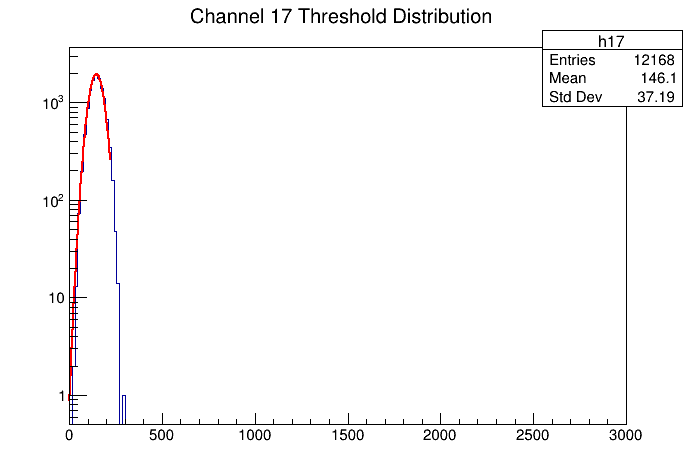

In [9]:
c1->Clear();
h[17]->Draw();
c1->SetLogy(1);
c1->Draw();

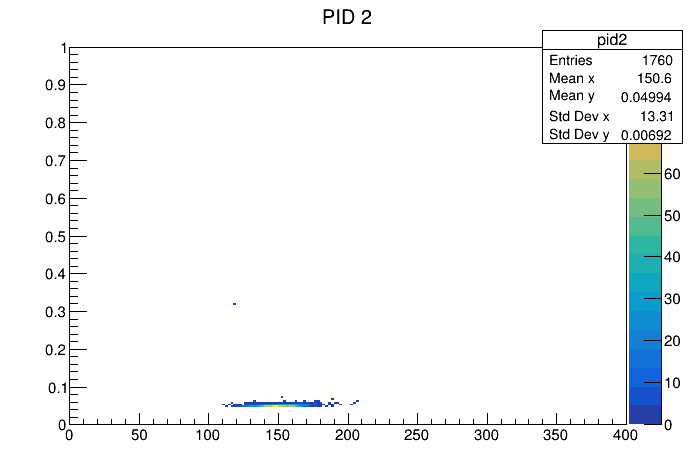

In [10]:
c1->Clear();
pid[2]->Draw("colz");
c1->SetLogy(0);
c1->Draw();

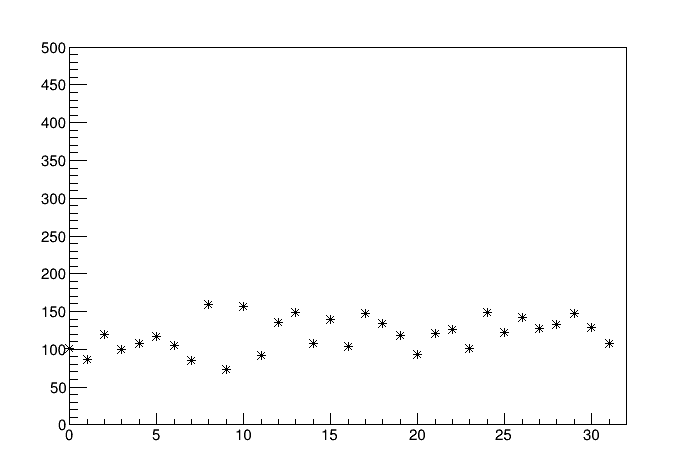

In [11]:
c1->Clear();
gmean->GetXaxis()->SetLimits(0, 32);
gmean->GetYaxis()->SetRangeUser(0 , 500.); 
gmean->SetMarkerStyle(3);
gmean->Draw("ap");
c1->SetLogy(0);
c1->Draw();

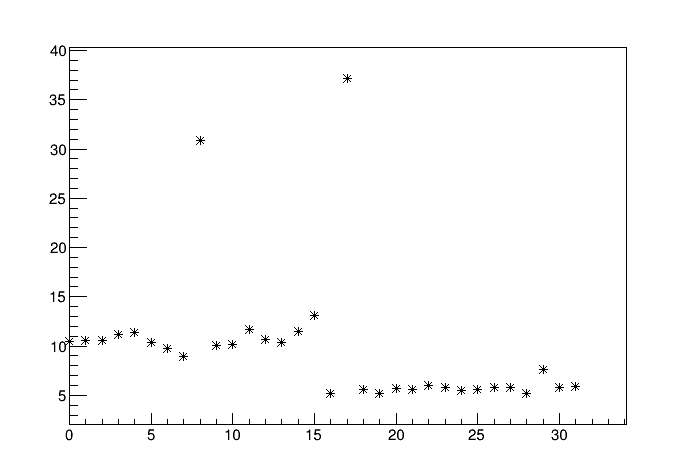

In [12]:
c1->Clear();
gsigma->SetMarkerStyle(3);
gsigma->Draw("ap");
c1->SetLogy(0);
c1->Draw();

In [13]:
for(Int_t ii=0;ii<32;ii++){
    cout<<mean[ii]<<", ";
}
cout<<'\n'<<'\n';
for(Int_t ii=0;ii<32;ii++){
    cout<<sigma[ii]<<", ";
}

101.41, 85.9582, 119.862, 99.3804, 107.025, 117.355, 105.137, 85.4533, 159.833, 73.7489, 156.371, 91.5675, 135.216, 148.397, 108.299, 139.727, 103.445, 146.796, 133.636, 117.957, 92.5906, 120.463, 126.353, 101.08, 148.785, 122.64, 142.133, 127.232, 132.973, 147.667, 128.379, 107.932, 

10.5095, 10.5656, 10.5704, 11.1355, 11.3446, 10.3449, 9.78257, 8.98607, 30.8217, 10.091, 10.1617, 11.654, 10.6389, 10.3475, 11.5082, 13.0955, 5.20498, 37.1388, 5.60105, 5.20249, 5.72907, 5.63799, 5.98845, 5.76847, 5.47755, 5.54717, 5.82503, 5.81556, 5.20665, 7.5991, 5.7919, 5.85126, 